### study and visualize the data

We have 5 columns in our dataset
1. id : id of the tweet
2. keyword : keyword in the tweet
3. location : location where the tweet was sent
4. text : actual content of the tweet
5. target : label of the tweet

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def read_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
train_path = "./data/train.csv"
train_data = read_data(train_path)
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
len(train_data)

7613

### Keyword column

In [5]:
train_data["keyword"].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

#### keyword contains %20 which denotes a space, clean it up

In [6]:
import urllib
train_data["keyword"].replace(np.nan,"-",inplace=True)
train_data["keyword"] = train_data["keyword"].apply(lambda x:urllib.parse.unquote(x))
print(train_data["keyword"].unique())
print("Number of unique keywords : ",len(train_data["keyword"].unique()))

['-' 'ablaze' 'accident' 'aftershock' 'airplane accident' 'ambulance'
 'annihilated' 'annihilation' 'apocalypse' 'armageddon' 'army' 'arson'
 'arsonist' 'attack' 'attacked' 'avalanche' 'battle' 'bioterror'
 'bioterrorism' 'blaze' 'blazing' 'bleeding' 'blew up' 'blight' 'blizzard'
 'blood' 'bloody' 'blown up' 'body bag' 'body bagging' 'body bags' 'bomb'
 'bombed' 'bombing' 'bridge collapse' 'buildings burning'
 'buildings on fire' 'burned' 'burning' 'burning buildings' 'bush fires'
 'casualties' 'casualty' 'catastrophe' 'catastrophic' 'chemical emergency'
 'cliff fall' 'collapse' 'collapsed' 'collide' 'collided' 'collision'
 'crash' 'crashed' 'crush' 'crushed' 'curfew' 'cyclone' 'damage' 'danger'
 'dead' 'death' 'deaths' 'debris' 'deluge' 'deluged' 'demolish'
 'demolished' 'demolition' 'derail' 'derailed' 'derailment' 'desolate'
 'desolation' 'destroy' 'destroyed' 'destruction' 'detonate' 'detonation'
 'devastated' 'devastation' 'disaster' 'displaced' 'drought' 'drown'
 'drowned' 'drown

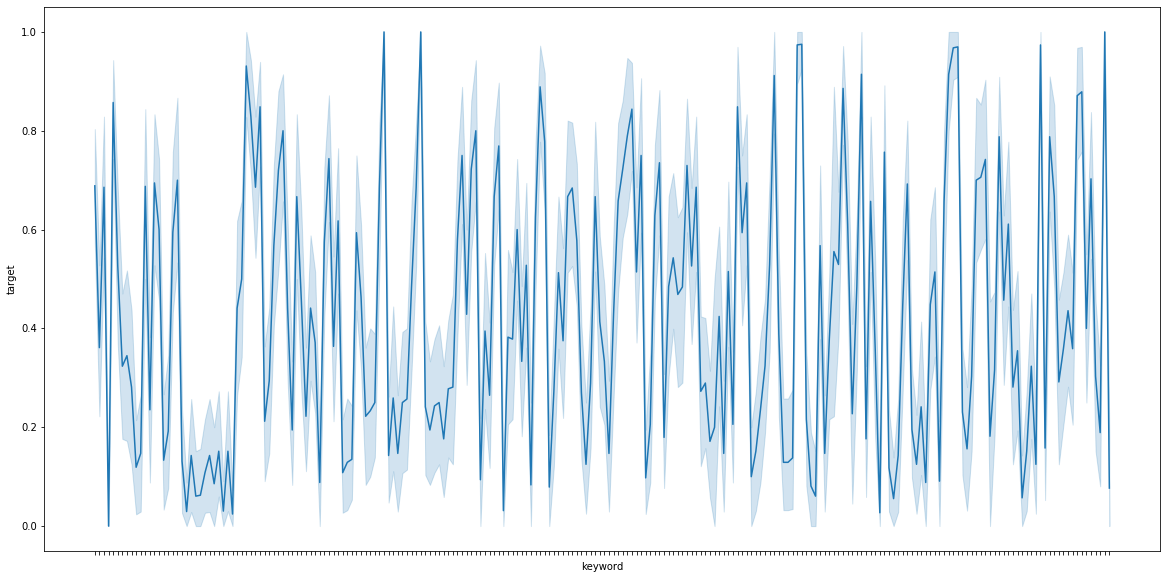

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,10))
chart = sns.lineplot(x="keyword",y="target",data=train_data)
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

### location

In [8]:
train_data["location"].replace(np.nan,"-",inplace=True)
print(list(train_data["location"].unique()))
print("Number of unique keywords : ",len(train_data["location"].unique()))

['-', 'Birmingham', 'Est. September 2012 - Bristol', 'AFRICA', 'Philadelphia, PA', 'London, UK', 'Pretoria', 'World Wide!!', 'Paranaque City', 'Live On Webcam', 'milky way', 'GREENSBORO,NORTH CAROLINA', 'England.', 'Sheffield Township, Ohio', 'India', 'Barbados', 'Anaheim', 'Abuja', 'USA', 'South Africa', 'Sao Paulo, Brazil', 'hollywoodland ', 'Edmonton, Alberta - Treaty 6', 'Inang Pamantasan', 'Twitter Lockout in progress', 'Concord, CA', 'Calgary, AB', 'San Francisco', 'CLVLND', 'Nashville, TN', 'Santa Clara, CA', 'UK', 'St. Louis, MO', 'Walker County, Alabama', 'Australia', 'North Carolina', 'Norf Carolina', 'San Mateo County, CA', 'Njoro, Kenya', "Your Sister's Bedroom", 'Arlington, TX', 'South Bloomfield, OH', 'New Hanover County, NC', 'Maldives', 'Manchester, NH', 'Wilmington, NC', 'global', 'Alberta | Sask. | Montana', 'Charlotte', 'Baton Rouge, LA', 'Hagerstown, MD', 'Gloucestershire , UK', 'Nairobi, Kenya', 'Instagram - @heyimginog ', '304', 'Switzerland', 'US', 'Somewhere Onl

In [9]:
train_data["location"].value_counts().head(1000)

-                        2533
USA                       104
New York                   71
United States              50
London                     45
                         ... 
#UNITE THE BLUE             1
State College, Pa           1
PS4, now stop asking        1
 Blood Indian Reserve       1
AZ                          1
Name: location, Length: 1000, dtype: int64

In [10]:
import re
train_data["location"] = train_data["location"].apply(lambda x: re.sub("[^-a-zA-Z\s]","",x))
print(list(train_data["location"].unique()))

['-', 'Birmingham', 'Est September  - Bristol', 'AFRICA', 'Philadelphia PA', 'London UK', 'Pretoria', 'World Wide', 'Paranaque City', 'Live On Webcam', 'milky way', 'GREENSBORONORTH CAROLINA', 'England', 'Sheffield Township Ohio', 'India', 'Barbados', 'Anaheim', 'Abuja', 'USA', 'South Africa', 'Sao Paulo Brazil', 'hollywoodland ', 'Edmonton Alberta - Treaty ', 'Inang Pamantasan', 'Twitter Lockout in progress', 'Concord CA', 'Calgary AB', 'San Francisco', 'CLVLND', 'Nashville TN', 'Santa Clara CA', 'UK', 'St Louis MO', 'Walker County Alabama', 'Australia', 'North Carolina', 'Norf Carolina', 'San Mateo County CA', 'Njoro Kenya', 'Your Sisters Bedroom', 'Arlington TX', 'South Bloomfield OH', 'New Hanover County NC', 'Maldives', 'Manchester NH', 'Wilmington NC', 'global', 'Alberta  Sask  Montana', 'Charlotte', 'Baton Rouge LA', 'Hagerstown MD', 'Gloucestershire  UK', 'Nairobi Kenya', 'Instagram - heyimginog ', '', 'Switzerland', 'US', 'Somewhere Only We Know ', 'Belgium', 'dope show', 'Osh

1. the data is very noisy
2. sometimes it specify the country only, and some times places in the country
3. there are many fields where the location is not an actual place

### Text

In [11]:
train_data["text"].apply

<bound method Series.apply of 0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object>

In [12]:
train_data["text"] = train_data["text"].apply(lambda x: re.sub("[^\w\s#'_]","",x)).apply(lambda x:x.lower())
train_data["text"] = train_data["text"].apply(lambda x: " ".join([a for a in re.split("([#$])",x) if len(a)!=0]))
train_data.head(10)

,id,keyword,location,text,target
0,1,-,-,our deeds are the reason of this # earthquake...,1
1,4,-,-,forest fire near la ronge sask canada,1
2,5,-,-,all residents asked to 'shelter in place' are ...,1
3,6,-,-,13000 people receive # wildfires evacuation o...,1
4,7,-,-,just got sent this photo from ruby # alaska a...,1
5,8,-,-,# rockyfire update california hwy 20 closed i...,1
6,10,-,-,# flood # disaster heavy rain causes flash fl...,1
7,13,-,-,i'm on top of the hill and i can see a fire in...,1
8,14,-,-,there's an emergency evacuation happening now ...,1
9,15,-,-,i'm afraid that the tornado is coming to our area,1


In [14]:
train_data["text"].apply(lambda x : len(x.split())).max()

35